# [Public Policy 190] Data Cleaning EDA Notebook

<br>

**Estimated Time:** __ minutes <br>
**Notebook Developed By:** Skye Pickett, Leah Hong, Emily Guo, Reynolds Zhang <br>

Paragraph summary of what they will be learning, what our data is about, what concepts / tools using. This notebook uses Python (coding language) and Pandas (a Python library).

### Learning Outcomes

In this notebook, you will learn about:
- Learning Objective #1
- Learning Objective #2
- Learning Objective #3
- Learning Objective #4
- etc...

### Table of Contents
1. [Introduction to Data Cleaning](#0) <br>
1. [Data Cleaning Techniques](#1) <br>
1. [Introduction to the Dataset](#2) <br>
1. [Cleaning the Dataset](#3)<br>
1. [Exploratory Data Analysis](#4) <br>
1. [Conclusion](#5) <br>
1. [Submitting Your Work](#6)<br>
1. [Explore Data Science Opportunities](#7)<br>
1. [Feedback Form](#8)<br>

-------------------------------------------------------------------

<br>

# 1. Introduction to Data Cleaning <a id='0'></a>

First, let's import all the necessary packages so we can use their tools in the rest of the notebook. Run the cell below.

In [10]:
# Run this cell
import numpy as np
import pandas as pd
import folium
import ipywidgets as widgets
from IPython.display import display, HTML
from otter import Notebook
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
print("All necessary packages have been imported!")

All necessary packages have been imported!


### 1.1 What is Data Cleaning?

In this notebook, we will first focus on data cleaning. You will be given a collection of data to analyze and answer questions about. Prior to this, we need to make sure that the data is clean and ready so that we can understand the extent of our analyses found in EDA (Exploratory Data Analysis). 

>**Data cleaning** is the process of transforming raw data to improve understandability by addressing issues inside of a dataset. Through the process, we focus on the structure/format of the dataset, missing or corrupted values, unit conversion, and changing the *type* of collected values.

#### Example of Un-Cleaned Data

<img src="Data/dirty_dataset.png" alt="Dirty Dataset"/>

<font color = #d14d0f>**QUESTION 1**:</font>
**What seems wrong in the dataset pictured above? Observe issues within at least 3 different columns.**

*REPLACE THIS TEXT WITH YOUR RESPONSE. DOUBLE CLICK THIS CELL, TYPE YOUR RESPONSE, AND RUN THE CELL TO SAVE AND DISPLAY YOUR RESPONSE.*

#### Example: Cleaned Dataset vs Uncleaned Dataset

In [11]:
elections = Table.read_table("elections.csv")
elections.show(10)

Candidate,Party,%,Year,Result
Reagan,Republican,50.7,1980,win
Carter,Democratic,41,1980,loss
Anderson,Independent,6.6,1980,loss
Reagan,Republican,58.8,1984,win
Mondale,Democratic,37.6,1984,loss
Bush,Republican,53.4,1988,win
Dukakis,Democratic,45.6,1988,loss
Clinton,Democratic,43,1992,win
Bush,Republican,37.4,1992,loss
Perot,Independent,18.9,1992,loss


The dataset elections is an example of a cleaned dataset that is ready for EDA. When looking at the column names and values, we see that the observations are clear and easy to manipulate for data analysis. 

In [12]:
police_calls = Table.read_table("berkeleyPDcalls.csv")
police_calls.show(10)

CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
18022300,DISTURBANCE,04/18/2018 12:00:00 AM,22:17,DISORDERLY CONDUCT,3,09/06/2018 03:30:12 AM,"OREGON STREET & MCGEE AVE Berkeley, CA (37.856572, - ...",OREGON STREET & MCGEE AVE,Berkeley,CA
18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE Berkeley, CA (37.865511, -122.309967)",200 UNIVERSITY AVE,Berkeley,CA
18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST Berkeley, CA (37.868574, -122.270415)",2200 MILVIA ST,Berkeley,CA
18014810,BURGLARY AUTO,03/13/2018 12:00:00 AM,08:50,BURGLARY - VEHICLE,2,09/06/2018 03:30:08 AM,"1200 SIXTH ST Berkeley, CA (37.881142, -122.30191)",1200 SIXTH ST,Berkeley,CA
18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET & SHATTUCK AVE Berkeley, CA (37.870308 ...",CENTER STREET & SHATTUCK AVE,Berkeley,CA
18044311,VANDALISM,08/07/2018 12:00:00 AM,10:46,VANDALISM,2,09/06/2018 03:30:10 AM,"2300 SHATTUCK AVE Berkeley, CA (37.867176, -122.267802)",2300 SHATTUCK AVE,Berkeley,CA
18090660,IDENTITY THEFT,04/04/2018 12:00:00 AM,14:00,FRAUD,3,09/06/2018 03:30:12 AM,"1000 EUCLID AVE Berkeley, CA (37.891594, -122.264883)",1000 EUCLID AVE,Berkeley,CA
18091024,THEFT MISD. (UNDER $950),06/27/2018 12:00:00 AM,13:40,LARCENY,3,09/06/2018 03:30:13 AM,"1500 HARMON ST Berkeley, CA (37.848812, -122.278043)",1500 HARMON ST,Berkeley,CA
18015688,VEHICLE STOLEN,03/17/2018 12:00:00 AM,02:00,MOTOR VEHICLE THEFT,6,09/06/2018 03:30:08 AM,"CEDAR STREET & EUCLID AVE Berkeley, CA (37.879467, - ...",CEDAR STREET & EUCLID AVE,Berkeley,CA
18029899,ASSAULT/BATTERY MISD.,05/26/2018 12:00:00 AM,07:35,ASSAULT,6,09/06/2018 03:30:13 AM,"2700 SACRAMENTO ST Berkeley, CA (37.858433, -122.280183)",2700 SACRAMENTO ST,Berkeley,CA


When looking at the police_calls dataset above, we first notice that the observations values are much more disordered than the elections dataset. Looking at the column names first, users looking at the data may not know what *EVENTTTM*, *CVLEGEND*, and *CVDOW* stand for. Then looking at the column values with numerical values such as *EVENTTM* or *InDbDate*, the observation values are difficult to compute analysis with. For *EVENTTM*, looking at just the hour value may be easier for data manipulation. Another observation is that the *Block_Location* and *BLKADDR* both contain the street names that is repetitive. These are a couple of key observations that we may need to change when cleaning our dataset to be ready for EDA. 

### 1.2 Significance of Data Cleaning

Reason 1)  
Makes it easier to work with column values and manipulate them for later analysis in EDA

Reason 2)  
The removal of errors when multiple sources of data are at play

Reason 3)  
Ability to map the different functions and what your data is intended to do

Reason 4)  
We are able to better monitor errors and see where they come from, which makes it easier to fix incorrect data for future use 

# 2. Data Cleaning Techniques <a id='1'></a>



Now, we are going to learn some data cleaning techniques; the famous titanic dataset is used for demo purpose.

In [13]:
titanic_dataset = Table.read_table("titanic_dataset.csv")
titanic_dataset.show(5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OnboardTime
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,4/10/1912 9:42
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,-,1,0,PC 17599,71.2833,C85,C,4/10/1912 9:54
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,4/10/1912 9:55
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,na,1,0,113803,53.1,C123,S,4/10/1912 8:06
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,4/10/1912 9:10


### 2.1 Handling Missing Data

 #### What is the missing data and what can it look like?
A missing value in a relational database refers to an unknown or missing value in a column. Missing values are usually represented as null values, empty strings, 0s, and NaN.

In this example, we found that there are 3 missing values in the `Age` column:`-`, `na` and `NaN`.

In [14]:
# Use `isnull` to check if the value is null. We need to use replace to unify the null values

# get the frist 10 elements of the 'Age' Numpy array
titanic_dataset.column('Age')[:10] 

array(['22', '-', '26', 'na', '35', 'nan', '54', '2', 'nan', '14'],
      dtype='<U32')

In [15]:
df1 = pd.read_csv("titanic_dataset.csv") # using pandas to import the dataset
df1['Age'].isnull().head(10) 

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8     True
9    False
Name: Age, dtype: bool

However, Pandas doesn’t recognize `-` and `na` as null. We have to replace them with null before dealing with them.

In [16]:
# example code of using replace to unify null values
df1['Age'] = df1['Age'].replace('-', np.NaN)
df1['Age'] = df1['Age'].replace('na', np.NaN)
df1["Age"].head(10) # now all null values are NaN values

0     22
1    NaN
2     26
3    NaN
4     35
5    NaN
6     54
7      2
8    NaN
9     14
Name: Age, dtype: object

#### Dealing with null data
Now that we have replaced all na and - values with null values, how are we going to deal with them as missing values? This is dependent on the context of the data. Here are a few different solutions:

#### Solution 1: Drop the observation (row) / feature (column)
If we are sure that the missing data is not useful for our EDA or that the missing data is only a small portion of the data, we can drop the rows that contain missing values. If we are confident that this feature (column) does not provide useful information for our EDA or that the percentage of missing values is high, we can drop the entire column. This is very useful when doing statistical analysis, since filling in the missing values may yield unexpected or biased results.

#### Solution 2: Impute the missing values
Imputing the missing values means that we make calculations based on the other data to fill the missing values.

For example, we can compute missing values for age with the date of birth by subtracting their birth year by the current year. This solution would be accurately imputing the values.

However, in many cases, we do not have the date of birth or an alternate representation of the data. We can then replace the missing values with the mean, median, or mode of the data.

#### When to choose the mode:
When we have categorical data, we will often choose the mode to represent missing values. We can't find the mean or median of categorical data (for example, finding the mean of 'Strawberry', 'Banana', and 'Orange' doesn't make sense).

#### Choose between mean and median: 
The **mean** is most useful when the data is not skewed because the mean is sensitive/easily influenced by outliers.

The **median** is more robust and is not sensitive to outliers. Thus when the data is skewed, we want to use the median. 

### 2.2 Understanding Column Names

In some cases, the column name may be an abbreviation, a long phrase, or a database-specific term. In these cases, we would want to replace the column names with more user-friendly names for understandability and ease during EDA.

### 2.3 Manipulating Columns


#### Remove duplicates
If we want to check for duplicates in the data, `.duplicated()` is the function needed.

Using `df[df.duplicated(keep=False)]` shows all duplicates.

`keep` : allows a few parameters to check on duplicates

`first` : mark duplicates as True except for the first occurrence

`last` : mark duplicates as True except for the last occurrence

`False` : mark all duplicates as True

Now we have seen there are duplicates in this dataset. I would like to remove them and keep the first occurrence. 

The following function is used to keep the `first` occurrence: `df = df.drop_duplicates(keep="first")`

In [54]:
len(df1) # length before drop_duplicates

895

In [17]:
df1 = df1.drop_duplicates(keep="first") # drop all duplicates but the first one
len(df1)

891

In [18]:
df1[df1.duplicated(keep=False)] # no duplicates remain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OnboardTime


#### Dropping unnecessary columns with “drop”
We have learned `drop` in the previous notebooks. Based on your observation, if you believe there is an invalid/null column that you do not need, you can drop it by using the function below.

In [19]:
df1.drop(columns="OnboardTime", inplace = True)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


If you wish to drop multiple columns, an array is needed to pass in columns parameter.

`inplace = True` will do the operation directly on the dataframe itself.

By default, it will create another copy where you will have to reassign it to a dataframe such as `df2 = df1.drop(columns="Unnamed: 11")`.

### 2.4 Mapping Table Values

Sometimes, the values of some inputs that should be unified may not be unified.

In [21]:
# use “unique()” to find all the possible, unique values in a column
df1["Sex"].unique()

array(['male', 'female', 'm', 'm ', 'M', 'F', 'f'], dtype=object)

In the example above, we found that there are “male, m, M, F, f, female, Female” values in the column “sex”, which makes the column difficult to use. If we unify the values, it will be easier for data manipulation.

(0.0, 100.0)

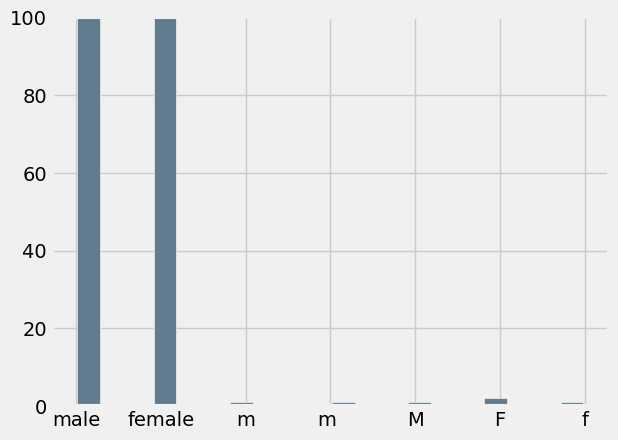

In [22]:
df1["Sex"].hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e').set_ylim(0, 100)


Now, what we want to do is use `column.map` to change the input data to the two unified values (for instance, we can change all “M, m, male” to “male”). Then, we have all representations of Females as `female` and Males as `male`.

In [23]:
df1["Sex"] = df1["Sex"].map({
   "male": "male",      
   "m": "male",
   "m ": "male",
  "M": "male",
   "F": "female",
    "f": "female",
    "female": "female"
})

The function above is used to map those values to male or female.

Note: please make sure the default values male and female are included in the mapping, else it will become nan after you perform the mapping.
Here is what the `df1["Sex"]` looks like after mapping.

In [24]:
df1["Sex"].unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:>

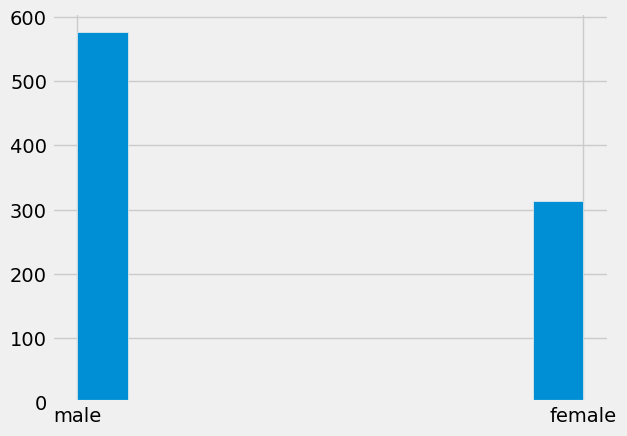

In [25]:
df1["Sex"].hist()

### 2.5 Using `.where`

When we want to filter data to only have what we want to look at (especially with really large data), the `.where` function is useful. For example, if you have data from 1970 to 2019 but only want data after 2010, you can use `df1 = df.where(df["year"], are.above(2010))` to filter the data to create a dataframe `df1` that only has rows where the year is greater than 2010. 

*More instructions on `.where` in Part 3*

### 2.6 Converting Data Type

If we want to convert our data to a more suitable unit (strings to numbers), you can use the `.astype()` function. Converting data can make computations such as calculating the mean, mode, or standard deviation possible. 

*More instructions in Part 3*

# 3. Introduction to the Dataset <a id='2'></a>

We will be using data made available by the San Francisco Department of Public Health. This data outlines restaurant food safety scores for restaurants in San Francisco. We will go through the data to explore and explain what data was collected.

**Source:** [click here](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i).

### 3.1 Reading in the Data

What is the title of the dataset? Where does the data come from? How was the data collected? How are certain variables/features coded? 

**Link the source of the data and the metadata for students to read more information about?**

> Answer the aforementioned questions here.

The command `pd.read_csv` allows us to read and loads our csv file and `.head()` gives us the first 5 rows of the dataset. Run the code cell below to load the data that we will be using for analysis.

In [26]:
# This cell will read in the necessary data sets. Run it and take a look at the dataframe / table below!

bus = pd.read_csv('Data/bus.csv') # reads the csv file and loads it
ins = pd.read_csv('Data/ins.csv')

In [27]:
from IPython.display import HTML
### Skye will work on these cells - don't touch please
hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:1" type="submit" value="Click here to reveal the raw code."></form>''')

In [28]:
hide_me
numlst = ins['iid'].str.split("_")
ins["bid"] = numlst.str[0].astype(int)
ins['timestamp'] = pd.to_datetime(ins['date'])
ins = ins[ins["score"] > 0]
ins = ins.rename(columns={"bid": "business id column"})
ins = ins.drop(columns = ['iid'])
bus_data = pd.merge(left = ins, right = bus,
                  left_on = "business id column", right_on = "business id column")

### Skye will work on these cells - don't touch please

This is our DataFrame:

In [29]:
bus_data = Table.from_df(bus_data)
bus_data.show(10)

date,score,type,business id column,timestamp,name,address,city,state,postal_code,latitude,longitude,phone_number
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,14154827284
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,14155279839
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,-9999
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,14155300260
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,14155300260
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,14155642006
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,-9999
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,-9999
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,14155981866
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,14155397209


### 3.2 Understanding the Data

#### 3.2.1 Rows

Let's take a look at the first row of the dataset for Name_Of_Dataset using `.take()`. This function takes in a list of the indexes that you want to view the corresponding rows of. Here, we want to see the first row only, which is the row at the 0th index.

In [30]:
bus_data.take(0)

date,score,type,business id column,timestamp,name,address,city,state,postal_code,latitude,longitude,phone_number
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,14154827284


---
<font color = #d14d0f>**QUESTION __**:</font> **Based on the above exploration, what does each record represent?**


**A. "One location of a restaurant."**

**B. "A chain of restaurants."**

**C. "A city block."**

*REPLACE THIS TEXT WITH YOUR RESPONSE. DOUBLE CLICK THIS CELL, TYPE YOUR RESPONSE, AND RUN THE CELL TO SAVE AND DISPLAY YOUR RESPONSE.*

---
Write paragraph that answers these questions:

What does this particular row in our data represent? How can we generalize this for each row of the data? What does each row of the data represent? Encourage students to change the index / selection of a row of the data and see for themselves a different sample row of the data.

#### 3.2.2. Columns

Run the code cell below to see the list of the columns in our dataset.

In [31]:
bus_data.labels

('date',
 'score',
 'type',
 'business id column',
 'timestamp',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'phone_number')

Explain here what all the columns mean.

In [32]:
# code to extract a single column

Try taking a single column and output the first 5-10 values and explain to the students what they should be seeing. Encourage them to try a different string/name. 

### 3.3 Hypothesizing


Hypothesis info

---
<font color = #d14d0f>**QUESTION __**:</font> **Question**


*REPLACE THIS TEXT WITH YOUR RESPONSE. DOUBLE CLICK THIS CELL, TYPE YOUR RESPONSE, AND RUN THE CELL TO SAVE AND DISPLAY YOUR RESPONSE.*

---
### 3.4 Cleaning the Dataset


In the next section, we will begin to clean our dataset.

---

<font color = #d14d0f>**QUESTION __**:</font> **Look at our dataset and list at least 3 things that you think should be fixed/cleaned before we begin analysis.**

*(See Section 2 to review common qualities of DataFrames that get changed during the Data Cleaning process and look at the `bus_data` DataFrame in 3.1 and see if you notice anything that looks off.)*

*REPLACE THIS TEXT WITH YOUR RESPONSE. DOUBLE CLICK THIS CELL, TYPE YOUR RESPONSE, AND RUN THE CELL TO SAVE AND DISPLAY YOUR RESPONSE.*

---

# 4. Cleaning the Dataset <a id='3'></a>


### 4.1 Manipulating columns


Show: dropping unnecessary columns, teaching how to use `.rename`, sorting columns

#### 4.1.1 Renaming columns

The bus_data dataframe contains a column called business id column which probably corresponds to a unique business id. However, we will first rename that column to bid for simplicity.

In [33]:
bus_data = bus_data.relabeled("business id column", "bid")

# see the new column name
bus_data.show(10)

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,phone_number
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,14154827284
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,14155279839
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,-9999
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,14155300260
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,14155300260
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,14155642006
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,-9999
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,-9999
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,14155981866
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,14155397209


#### 4.1.2 Dropping columns

There are some missing values in phone number column (-9999) but we don't need this column so we will drop it.

In [34]:
bus_data = bus_data.drop('phone_number')

# see the dataframe without the dropped column 
bus_data.show(10)

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999


### 4.2 Handling missing/incorrect data: `postal_code` column

In 3.4, you may have noticed that there are a large number of potentially invalid ZIP codes (e.g., "Ca"). These are likely due to data entry errors.

To get a better understanding of the potential errors in the zip codes we will:

1. Import a list of valid San Francisco ZIP codes by using pd.read_json to load the file data/sf_zipcodes.json and ultimately create a series of type str containing the valid ZIP codes.
2. Construct a DataFrame containing only the businesses which DO NOT have valid ZIP codes.

**Step 1**


In [35]:
valid_zips = pd.read_json("Data/sf_zipcodes.json")['zip_codes']
valid_zips.values

array([94102, 94103, 94104, 94105, 94107, 94108, 94109, 94110, 94111,
       94112, 94114, 94115, 94116, 94117, 94118, 94119, 94120, 94121,
       94122, 94123, 94124, 94125, 94126, 94127, 94128, 94129, 94130,
       94131, 94132, 94133, 94134, 94137, 94139, 94140, 94141, 94142,
       94143, 94144, 94145, 94146, 94147, 94151, 94158, 94159, 94160,
       94161, 94163, 94164, 94172, 94177, 94188])

After reading the file, we use `.dtype` to see that the zip codes have been read as integers.

In [36]:
valid_zips.dtype

dtype('int64')

Similarly to what was discussed in Section 2.6, we want to ensure that the type of value *(integer, string, double, etc.)* is representative of the data.

While zip codes are numbers, they are [nominal qualitative data](https://careerfoundry.com/en/blog/data-analytics/what-is-nominal-data/#:~:text=Nominal%20data%20is%20a%20type,of%20meaningful%20order%20or%20hierarchy.). As a result, we want them to be represented as strings.

---
<font color = #d14d0f>**QUESTION __**:</font> **Why should zip codes be stored as strings instead of integers?** (See link above for ideas.)

*Hint: We store variables as integers when we need to calculate the mean, sum, etc. of that variable. Would it make sense to do this with zip codes?*

*REPLACE THIS TEXT WITH YOUR RESPONSE. DOUBLE CLICK THIS CELL, TYPE YOUR RESPONSE, AND RUN THE CELL TO SAVE AND DISPLAY YOUR RESPONSE.*

---
To convert them, we can use the `astype` function to generate a copy of the Pandas series. This converts the array, `valid_zips`, to strings and reassigns the variable to the same name, `valid_zips`.

In [37]:
valid_zips = valid_zips.astype("string")

Now we'll use the same code as above to check what type the values are now.

In [38]:
valid_zips.dtype

string[python]

**Step 2**

Here we will use the `Series.isin` function. More details about this function are in its [documentation](https://www.geeksforgeeks.org/python-pandas-series-isin/#:~:text=isin(),-View%20Discussion&text=Pandas%20series%20is%20a%20One,performing%20operations%20involving%20the%20index.).

**What is a Series?**

Remember that the type of `bus_data` is a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). Every column in a DataFrame is a [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html). For example, the column `bid` is a series and so is the column `name`. Every column is a series regardless of what kind of data it contains.

In [40]:
# these are the names of the columns in bus_data
bus_data.labels

('date',
 'score',
 'type',
 'bid',
 'timestamp',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude')

We can see in the cell below that the type of the `bid` column is a series.

In [41]:
type(bus_data.column('bid'))

numpy.ndarray

Try replacing the `...` in the cell below with another column name to see that *every column* is a series!

In [42]:
type(bus_data.column(...))

ValueError: Ellipsis is not a label or index

Now we know that every column is a Series. Thus `Series.isin` can be applied to any column.

Let's assign the series that contains the `postal_code` column to a variable called `zip_code_series`.

In [43]:
zip_code_series = bus_data.column('postal_code')
zip_code_series

array(['94133', '94103', '94121', ..., '94110', '94108', '94108'],
      dtype='<U10')

`Series.isin()` returns True and False for every value in the series indicating whether or not that value "is in" the array or list inputted in the parentheses.

`zip_code_series.isin(valid_zips)` returns True if the zipcode in postal_code column is a valid zipcode and False otherwise.

In [44]:
is_valid_zip = np.isin(zip_code_series, valid_zips)
is_valid_zip

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

Let's add a column to our `bus_data` DataFrame to more obviously indicate which rows have invalid postal codes.

In [45]:
bus_data = bus_data.with_column('is_valid_zip', is_valid_zip)
bus_data.show(10)

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,True
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,True
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,True
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,True
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,True
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,True
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True


### 4.4 Filtering data


Let's view the rows in `bus_data` that have **invalid zip codes**.

In [46]:
incorrect_postal_codes = bus_data.where('is_valid_zip', False)
incorrect_postal_codes

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,85,Routine - Unscheduled,100126,2019-04-03 00:00:00,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999,-9999,False
08/16/2019 12:00:00 AM,98,Routine - Unscheduled,100660,2019-08-16 00:00:00,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999,-9999,False
04/25/2019 12:00:00 AM,92,Routine - Unscheduled,100781,2019-04-25 00:00:00,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999,-9999,False
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,101129,2019-09-06 00:00:00,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999,-9999,False
08/14/2017 12:00:00 AM,75,Routine - Unscheduled,10227,2017-08-14 00:00:00,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.7526,-122.416,False
03/07/2018 12:00:00 AM,83,Routine - Unscheduled,10227,2018-03-07 00:00:00,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.7526,-122.416,False
03/30/2017 12:00:00 AM,100,Routine - Unscheduled,10372,2017-03-30 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False
10/24/2017 12:00:00 AM,100,Routine - Unscheduled,10372,2017-10-24 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False
02/26/2018 12:00:00 AM,100,Routine - Unscheduled,10372,2018-02-26 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False
04/04/2019 12:00:00 AM,100,Routine - Unscheduled,10372,2019-04-04 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False


Look at the postal_code column above. We can notice 2 main patterns:
1. Many of these incorrect postal codes are `-9999`. 
2. Some other incorrect postal codes are incorrect because they give a postal code range, rather than a single code. (ie, `94105-1420` instead of `94105`)

#### 4.4.1 Investigating `-9999` Postal Codes
We've investigated the 1st pattern below. Read through this process and formulate an opinion on why these restaurant locations might have incorrect/missing information.

In [47]:
code_neg9999 = incorrect_postal_codes.where('postal_code', '-9999')
code_neg9999

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,85,Routine - Unscheduled,100126,2019-04-03 00:00:00,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999,-9999,False
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,101129,2019-09-06 00:00:00,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999,-9999,False
08/14/2017 12:00:00 AM,75,Routine - Unscheduled,10227,2017-08-14 00:00:00,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.7526,-122.416,False
03/07/2018 12:00:00 AM,83,Routine - Unscheduled,10227,2018-03-07 00:00:00,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.7526,-122.416,False
03/30/2017 12:00:00 AM,100,Routine - Unscheduled,10372,2017-03-30 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False
10/24/2017 12:00:00 AM,100,Routine - Unscheduled,10372,2017-10-24 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False
02/26/2018 12:00:00 AM,100,Routine - Unscheduled,10372,2018-02-26 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False
04/04/2019 12:00:00 AM,100,Routine - Unscheduled,10372,2019-04-04 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False
07/15/2017 12:00:00 AM,86,Routine - Unscheduled,10373,2017-07-15 00:00:00,El Tonayense #1,1717 Harrison St,San Francisco,CA,-9999,37.7694,-122.413,False
07/24/2017 12:00:00 AM,79,Routine - Unscheduled,10373,2017-07-24 00:00:00,El Tonayense #1,1717 Harrison St,San Francisco,CA,-9999,37.7694,-122.413,False


^ This shows us that there are 194 rows that have the incorrect postal_code `-9999`. Let's look at some of the locations of the restaurants that correspond to these values.

In [48]:
# 'Address' column
a = code_neg9999.column('address')
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{'1 Warriors Way Level 300 South West': 1,
 '1 franklin Ct': 1,
 '10 29th St': 5,
 '100 Diamond St': 2,
 '1001 Potrero Ave': 1,
 '101 Horne Ave': 3,
 '1051 Market St': 4,
 '1111 California St': 2,
 '1143 Taraval St': 3,
 '115 Sansome': 1,
 '1301 Cesar Chavez St': 1,
 '135 04th St FC-3': 3,
 '140 New Montgomery St': 2,
 '1400 Stockton St': 1,
 '144 Taylor St': 1,
 '1552 Ocean Ave': 3,
 '1605 Jerrold Ave': 1,
 "170 O'Farrell St": 1,
 '1717 Harrison St': 5,
 '1737 Post St 368': 2,
 '1760 Polk St': 2,
 '1801 Vicente St': 5,
 '1975 Bryant': 2,
 '2 Embarcadero Center  Street Level': 2,
 '201 2nd St': 1,
 '203 Parnassus Ave': 2,
 '2078 Hayes St': 2,
 '2229 Clement St': 3,
 '2277 Shafter Ave': 5,
 '235 Front St': 2,
 '2399 Van Ness Ave': 3,
 '24 Willie Mays Pl Field Level Rm 1.11.11': 4,
 '24 Willie Mays Pl Rm 2103': 3,
 '24 Willie Mays Pl Room 2142': 4,
 '24 Willie Mays Pl View Lvl Sect 331': 4,
 '24 Willie Mays Pl View Sect 320 Rm 5319': 4,
 '24 Willie Mays Plaza': 4,
 '2462 San Bruno Ave': 

This shows that there are 39 store locations that have addresses marked as "Off The Grid", 10 with addresses "Off the Grid", and 4 with addresses "OTG". These qualify as missing values for our data. Thus, will want to remove these rows from our `bus_data` DataFrame. We will do this after we address the second patern.

#### 4.4.2 Investigating Postal Code Ranges


Next, let's look at the 2nd pattern (where zip code ranges are listed rather than individual zip codes). We actually *can* fix this so we won't need to drop any of these values!

Every proper zip code is 5 digits long (ie, 94103). To turn the ranges into only a single zip code, we will use `str.slice` to "trim" the string. Remember that the `postal_code` column is made up of [strings](https://press.rebus.community/programmingfundamentals/chapter/string-data-type/) rather than integers. We use the code `str.slice(0,5)` to mean take a slice of the string from the 0th index up to the 5th index. This returns the 1st through 5th characters, which results in `94123-3106` turning into `94123`. For values that were already 5 digits long, this slice returns itself so nothing changes (ie, `94103` is still `94103`).

In [49]:
bus_data = bus_data.with_column('postal_code', pd.Series(bus_data.column('postal_code')).str.slice(0,5))
bus_data
# notice now all postal codes are 5 digits

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,True
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,True
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,True
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,True
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,True
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,True
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True


#### 4.4.3 Dropping Rows

Now that we've fixed postal code ranges, let's drop the values that are not valid postal codes. We do this by filtering our data. 

*The line of code translates to:*
> "The `bus_data` DataFrame now will be a DataFrame with only the rows in the `bus_data` DataFrame that had a `postal_code` that was in the list of valid zipcodes (`valid_zips`)".

In [50]:
bus_data = bus_data.where('is_valid_zip', True)
bus_data

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,True
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,True
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,True
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,True
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,True
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,True
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True


# 5. Exploratory Data Analysis  <a id='4'></a>


Exploratory Data Analysis allows you to "get to know the data". 

EDA is the process of transforming, visualizing, and summarizing data to:
* build / confirm understanding of the data and its provenance
* identify and address potential issues in the data
* inform the subsequent analysis 
* discover potential hypothesis 

EDA ia an open-ended analysis that allows us to be willing to find something surprising.

### 5.1 Plotting distributions for values in different columns


Question using .mean() to find the mean of a column of an uncleaned dataset
Indicate that this mean shouldn’t intuitively seem correct
Why data cleaning is important 
Find data that are not suitable when using mean
Try to clean the data to make the mean suitable: filter unwanted outliers


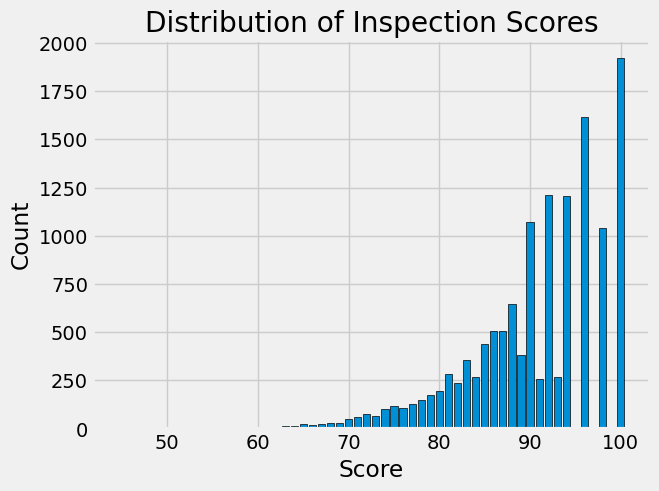

In [51]:
scoregrouped = bus_data.to_df().groupby(['score']).size()
plt.figure()
plt.bar(scoregrouped.index, scoregrouped.values, edgecolor = 'black')
plt.title('Distribution of Inspection Scores')
plt.xlabel('Score');
plt.ylabel('Count');

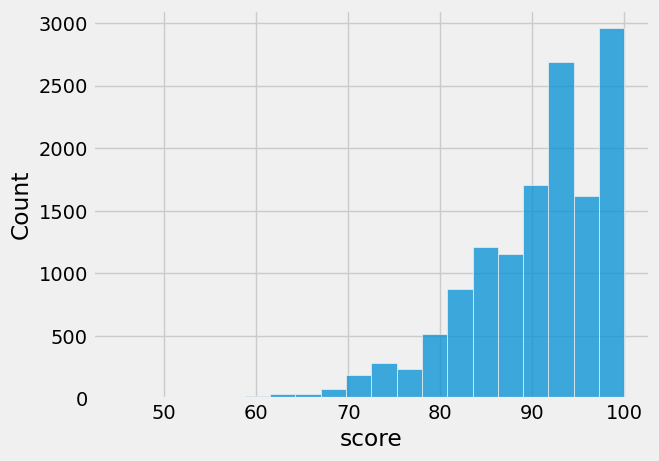

In [52]:
sns.histplot(bus_data, x = 'score', bins = 20);

### 5.2 Data Exploration


**5.2.1 Using `.group`**

What is the average score for each unique business id?

In [53]:
bus_data.group('bid', np.mean).select('bid', 'score mean')

bid,score mean
19,95
24,98
31,95
45,88.25
48,90.5
54,90.5
58,75.6667
61,95.3333
66,97.3333
73,86


**5.2.2 Mean socore**

What is the mean of the scores?

In [54]:
np.mean(bus_data.column('score'))

90.588036697247702

**5.2.3 Median score**

In [55]:
np.median(bus_data.column('score'))

92.0

**5.2.4 Distribution of the score column**

Explain more what .describe() does

In [56]:
from scipy import stats
stats.describe(bus_data.column('score'))

DescribeResult(nobs=13625, minmax=(45, 100), mean=90.588036697247702, variance=58.48566133159509, skewness=-1.0049349602871454, kurtosis=1.1746951455912606)

**5.2.5 Filtering unwanted outliers**

It seems like there are some extremely small values in the dataset. We will filter out the rows with scores below 60.

In [58]:
bus_data = bus_data.where('score', are.above_or_equal_to(60))
bus_data.show(10)

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,True
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,True
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,True
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,True
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,True
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,True
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True


### 5.3 Your Turn: Analyze the Data


We will provide an example here, then you will repeat the process two times below. Look back at your **hypothesis** to see what variables/columns you will want to focus on analyzing.

Question

In [59]:
#code to answer

#### Write your 1st analysis question here. (double-click to edit)

In [60]:
# Use this cell to code the answer to your question

#### Write your 2nd analysis question here. (double-click to edit)

In [61]:
# Use this cell to code the answer to your question

<br><br>
# 6. Conclusion <a id='5'></a>

**Validating the Data**

<font color = #d14d0f>**QUESTION __**:</font> **Does the data align with your expectations?**

*REPLACE THIS TEXT WITH YOUR RESPONSE. DOUBLE CLICK THIS CELL, TYPE YOUR RESPONSE, AND RUN THE CELL TO SAVE AND DISPLAY YOUR RESPONSE.*

<font color = #d14d0f>**QUESTION __**:</font> **Does the data prove or disprove your hypothesis? Does it bring you any insight?**

*REPLACE THIS TEXT WITH YOUR RESPONSE. DOUBLE CLICK THIS CELL, TYPE YOUR RESPONSE, AND RUN THE CELL TO SAVE AND DISPLAY YOUR RESPONSE.*

<font color = #d14d0f>**QUESTION __**:</font> **Did you find another trend that can help you formulate another hypothesis?**

*REPLACE THIS TEXT WITH YOUR RESPONSE. DOUBLE CLICK THIS CELL, TYPE YOUR RESPONSE, AND RUN THE CELL TO SAVE AND DISPLAY YOUR RESPONSE.*

### Sample Discussion Question: 
**Another Sample Question Here?**

REPLACE THIS TEXT WITH YOUR RESPONSE. DOUBLE CLICK THIS CELL, TYPE YOUR RESPONSE, AND RUN THE CELL TO SAVE AND DISPLAY YOUR RESPONSE.

In [62]:
# Sample Bonus Challenge code goes here

<br><br>
# 7. Submitting Your Work  <a id='=6'></a>

**@Devs ignore this section for now I will work on this -Skye**

If an instructor requires a PDF output for students based on their text Markdown Responses, we typically use the Otter package (developed here at Berkeley) to extract the student responses. To do this you can follow the instructions on this document: [How To Otter](https://docs.google.com/document/d/1Rl735LKpD_5gs6dUa8xJTILa510JeatIDB_M_FNRDow/edit?usp=sharing). Below is a sample code and markdown instructions we use to guide students to extract the text content from their notebook:

**Make sure that you've answered all the questions.**

You are now finished with this notebook!

> Please run the following cell to generate a download link for your responses and submit to Bcourses!

**Note:** If clicking the link below doesn't work for you, don't worry! Simply right click and choose `Save Link As...` to save a copy of your pdf onto your computer.

**Note:** If you made any changes to your responses and/or they are not reflected in your PDF, make sure to re-run all the cells. You can do this by going to the top and clicking `Cell >> Run All` and download your new PDF.

**Check the PDF before submitting and make sure all of your answers and any changes are shown.**

In [63]:
#This may take a few extra seconds.
from otter.export import export_notebook
from IPython.display import display, HTML
export_notebook("Notebook1.ipynb", filtering=True, pagebreaks=False)
display(HTML("<p style='font-size:20px'> <br>Save this notebook, then click <a href='Notebook1.pdf' download>here</a> to open the pdf.<br></p>"))

FileNotFoundError: [Errno 2] No such file or directory: 'Notebook1.ipynb'

<br><br>
# 8. Explore Data Science Opportunities  <a id='7'></a>

Interested in learning more about how to get involved in data science or learn about data science applications in your field of study? The following resources might help support your learning:

---

- Data Science Modules: http://data.berkeley.edu/education/modules

- Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings

- Data 8 Course Information: http://data8.org/

- Data 100 Course Information: https://ds100.org/


# 9. Feedback Form  <a id='8'></a>

<div class="alert alert-info">
<b> We encourage students to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

# [UC Berkeley Data Science Feedback Form](https://forms.gle/hipxf2uFw5Ud4Hyn8)